<a href="https://www.kaggle.com/code/gaurobsaha/donoriq-crm-donor-analytics-project?scriptVersionId=229477563" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# DonorIQ CRM Donor Analytics Project (Final Edition)

This notebook explores donor data for a university CRM system.

## Step 1: Load Dataset and Perform Preprocessing

In [1]:
# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/kaggle/input/customer-relationship-management-dataset/CRM_Donor_Simulation_Dataset (2).csv")

# Reparse date and compute derived columns
df["LastDonationDate"] = pd.to_datetime(df["LastDonationDate"])
today = pd.to_datetime("2025-03-24")
df["DaysSinceLastDonation"] = (today - df["LastDonationDate"]).dt.days

# Create tiers
df["EngagementTier"] = pd.cut(df["EngagementScore"], bins=[0, 40, 70, 100], labels=["Low", "Medium", "High"])
df["GivingTier"] = pd.cut(df["TotalAmountDonated"], bins=[0, 500, 2500, 10000, float("inf")], labels=["Small", "Moderate", "Large", "Major"])
df["RecencyTier"] = pd.cut(df["DaysSinceLastDonation"], bins=[-1, 90, 365, 1000, float("inf")], labels=["Recent", "Last Year", "Earlier", "Lapsed"])

df.head()  # Show preview


,DonorID,FirstName,LastName,Email,Phone,City,State,ZipCode,LastDonationDate,TotalGifts,TotalAmountDonated,EventParticipation,EngagementScore,DaysSinceLastDonation,EngagementTier,GivingTier,RecencyTier
0,D00001,Danielle,Anderson,tina69@salazar.com,(716)033-8417x8760,New Ethan,AK,9539,2024-09-03,10,8481.55,Yes,56,202,Medium,Large,Last Year
1,D00002,Angel,Hart,garciatyler@gmail.com,(874)907-2648,West Ashleymouth,MS,49618,2022-05-06,5,14102.15,Yes,11,1053,Low,Major,Lapsed
2,D00003,Joshua,Stone,ywoods@gmail.com,105.039.1678x12883,East Stephanie,NJ,6600,2023-01-21,21,5140.38,No,26,793,Low,Large,Earlier
3,D00004,Jeffrey,Welch,johnsonkimberly@ferguson.com,939.859.3082x278,South Andrewshire,SD,22434,2023-01-26,22,18555.04,Yes,92,788,High,Major,Earlier
4,D00005,Jill,Vasquez,hughesnicholas@gmail.com,469-539-5369,Moorestad,DC,16142,2022-05-05,10,1325.93,No,27,1054,Low,Moderate,Lapsed


## Step 2: Exploratory Data Analysis (EDA)
We explore the structure, quality, and summary of the dataset before diving into questions.

In [2]:
# Dataset info: structure, nulls, types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   DonorID                5000 non-null   object        
 1   FirstName              5000 non-null   object        
 2   LastName               5000 non-null   object        
 3   Email                  5000 non-null   object        
 4   Phone                  5000 non-null   object        
 5   City                   5000 non-null   object        
 6   State                  5000 non-null   object        
 7   ZipCode                5000 non-null   int64         
 8   LastDonationDate       5000 non-null   datetime64[ns]
 9   TotalGifts             5000 non-null   int64         
 10  TotalAmountDonated     5000 non-null   float64       
 11  EventParticipation     5000 non-null   object        
 12  EngagementScore        5000 non-null   int64         
 13  Day

In [3]:
# Summary statistics
df.describe()


,ZipCode,LastDonationDate,TotalGifts,TotalAmountDonated,EngagementScore,DaysSinceLastDonation
count,5000.000000,5000,5000.000000,5000.000000,5000.000000,5000.000000
mean,50231.523400,2023-09-12 20:00:23.040000,15.261400,12350.097270,50.899600,558.166400
min,523.000000,2022-03-21 00:00:00,1.000000,21.320000,1.000000,4.000000
25%,25877.500000,2022-12-11 18:00:00,8.000000,6248.907500,26.000000,291.000000
50%,49843.000000,2023-09-13 00:00:00,15.000000,12304.270000,51.000000,558.000000
75%,74898.000000,2024-06-06 00:00:00,22.000000,18440.480000,76.000000,833.250000
max,99936.000000,2025-03-20 00:00:00,29.000000,24991.840000,100.000000,1099.000000
std,28624.962295,NaN,8.292504,7133.844628,28.996284,314.496755


In [4]:
# Check null values
df.isnull().sum()


DonorID                  0
FirstName                0
LastName                 0
Email                    0
Phone                    0
City                     0
State                    0
ZipCode                  0
LastDonationDate         0
TotalGifts               0
TotalAmountDonated       0
EventParticipation       0
EngagementScore          0
DaysSinceLastDonation    0
EngagementTier           0
GivingTier               0
RecencyTier              0
dtype: int64

In [5]:
# Distribution of categorical features
print("\nEngagement Tiers:")
print(df["EngagementTier"].value_counts())
print("\nGiving Tiers:")
print(df["GivingTier"].value_counts())



Engagement Tiers:
EngagementTier
Low       1967
High      1545
Medium    1488
Name: count, dtype: int64

Giving Tiers:
GivingTier
Major       2990
Large       1509
Moderate     403
Small         98
Name: count, dtype: int64


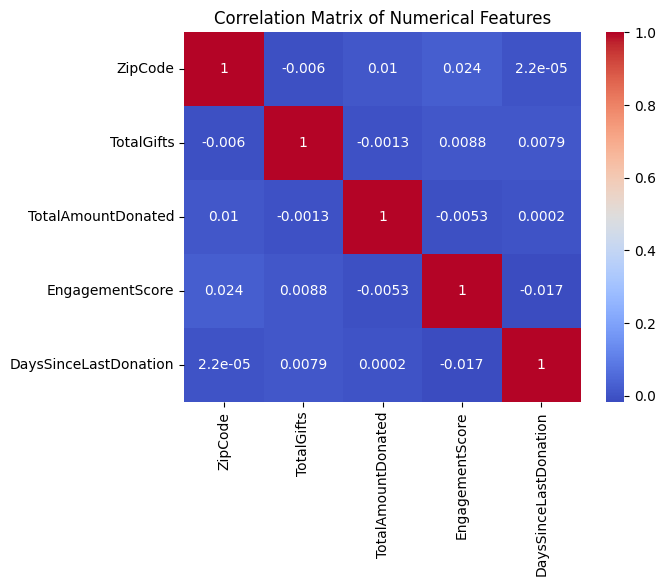

In [6]:
# Correlation matrix
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Numerical Features")
plt.show()


### Q1: What is the distribution of donors by Engagement Tier?
This helps us understand how engaged the donor base is overall.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


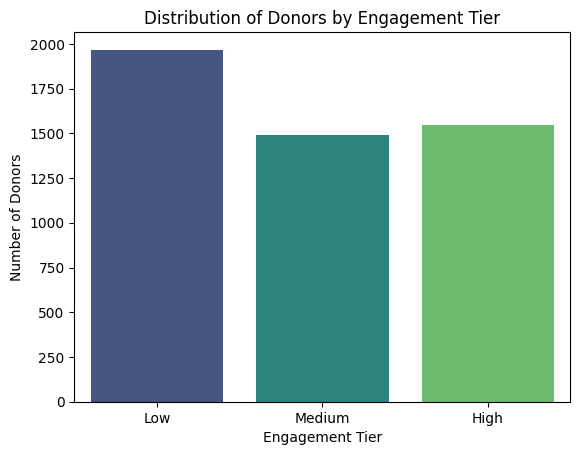

In [7]:
# Plot donor counts in each engagement tier
import seaborn as sns
sns.countplot(data=df, x="EngagementTier", palette="viridis")
plt.title("Distribution of Donors by Engagement Tier")
plt.xlabel("Engagement Tier")
plt.ylabel("Number of Donors")
plt.show()


### Q2: What is the average donation amount per Engagement Tier?
We check whether more engaged donors give larger amounts.

<ipython-input-8-d475f6e150b9>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("EngagementTier")["TotalAmountDonated"].mean().plot(kind='bar', color='teal')


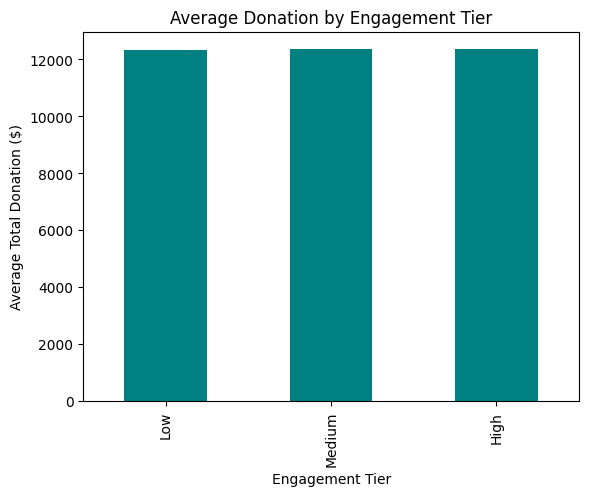

In [8]:
df.groupby("EngagementTier")["TotalAmountDonated"].mean().plot(kind='bar', color='teal')
plt.title("Average Donation by Engagement Tier")
plt.xlabel("Engagement Tier")
plt.ylabel("Average Total Donation ($)")
plt.show()


### Q3: How many total gifts were made in each Giving Tier?
This shows which donor groups are driving volume.

<ipython-input-9-2678224a9d66>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("GivingTier")["TotalGifts"].sum().plot(kind='bar', color='slateblue')


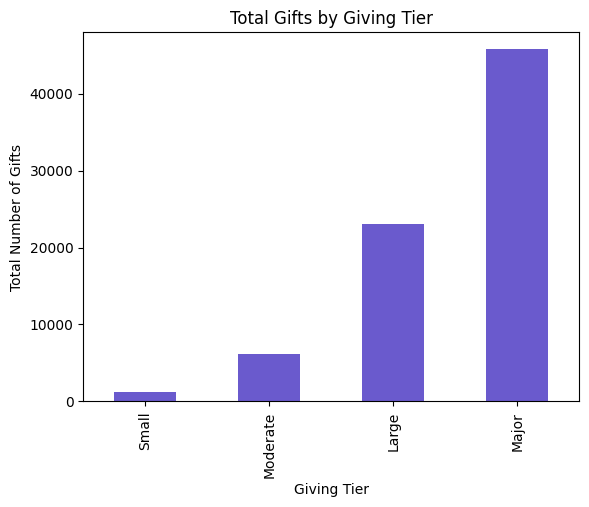

In [9]:
df.groupby("GivingTier")["TotalGifts"].sum().plot(kind='bar', color='slateblue')
plt.title("Total Gifts by Giving Tier")
plt.xlabel("Giving Tier")
plt.ylabel("Total Number of Gifts")
plt.show()


### Q4: What is the average number of gifts per donor in each Giving Tier?
Do smaller donors give more frequently?

<ipython-input-10-029251fbc3d8>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("GivingTier")["TotalGifts"].mean().plot(kind='bar', color='mediumseagreen')


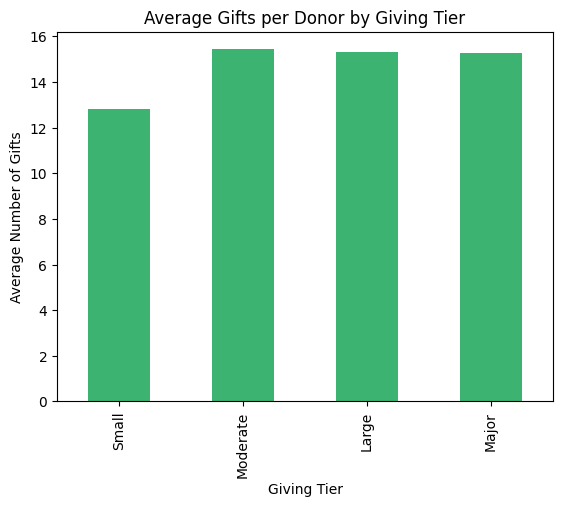

In [10]:
df.groupby("GivingTier")["TotalGifts"].mean().plot(kind='bar', color='mediumseagreen')
plt.title("Average Gifts per Donor by Giving Tier")
plt.xlabel("Giving Tier")
plt.ylabel("Average Number of Gifts")
plt.show()


### Q5: What are the correlations between numerical features?
This heatmap shows relationships between donation amount, engagement, gifts, and recency.

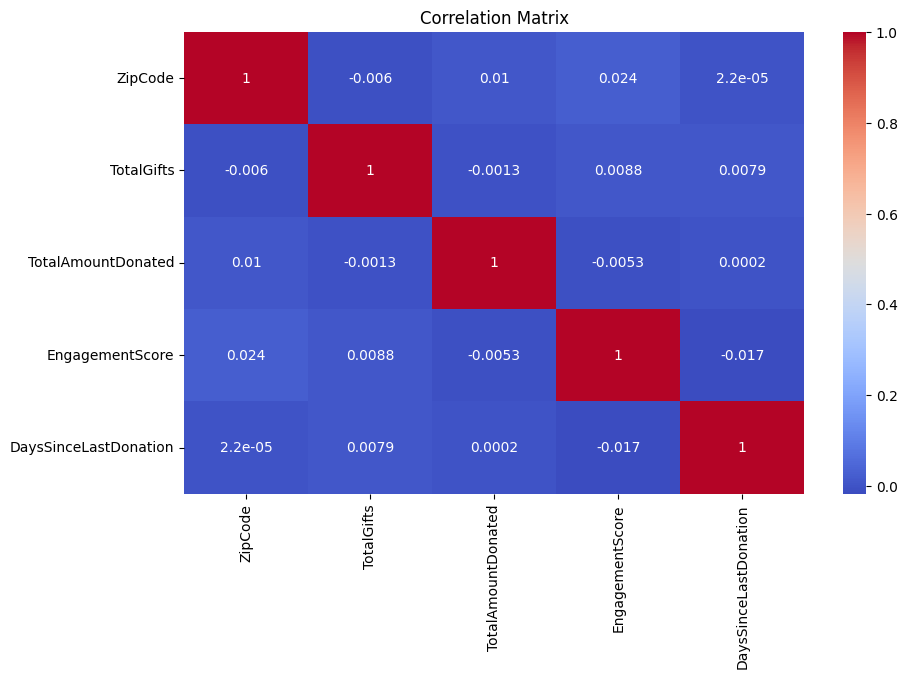

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


### Q6: What is the distribution of total donation amounts?
Helps detect skewness or anomalies in donation behavior.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


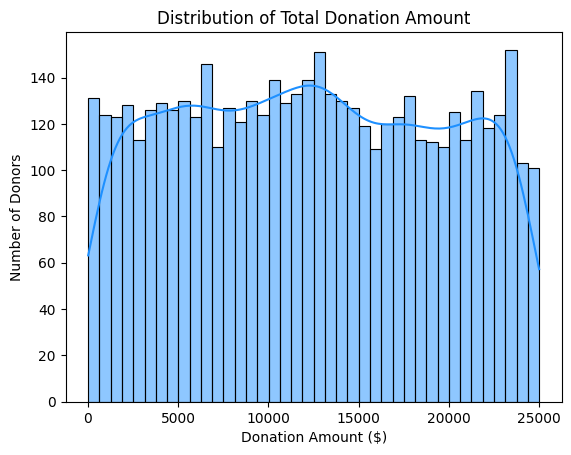

In [12]:
sns.histplot(df["TotalAmountDonated"], bins=40, kde=True, color="dodgerblue")
plt.title("Distribution of Total Donation Amount")
plt.xlabel("Donation Amount ($)")
plt.ylabel("Number of Donors")
plt.show()

### Q7: How recently have donors given?
A histogram of donation recency shows lapsed vs active donors.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


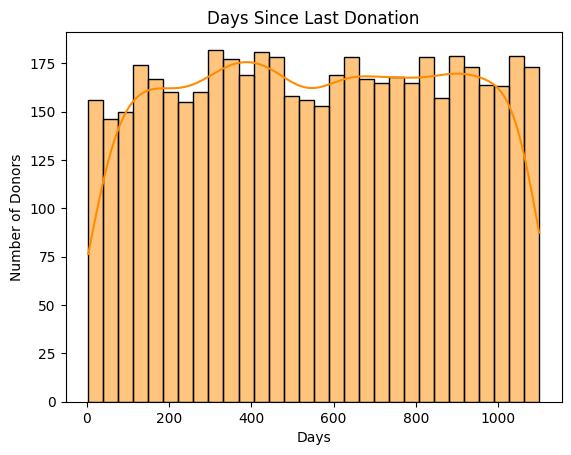

In [13]:
sns.histplot(df["DaysSinceLastDonation"], bins=30, color="darkorange", kde=True)
plt.title("Days Since Last Donation")
plt.xlabel("Days")
plt.ylabel("Number of Donors")
plt.show()

### Q8: How does donation amount vary across engagement levels?

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


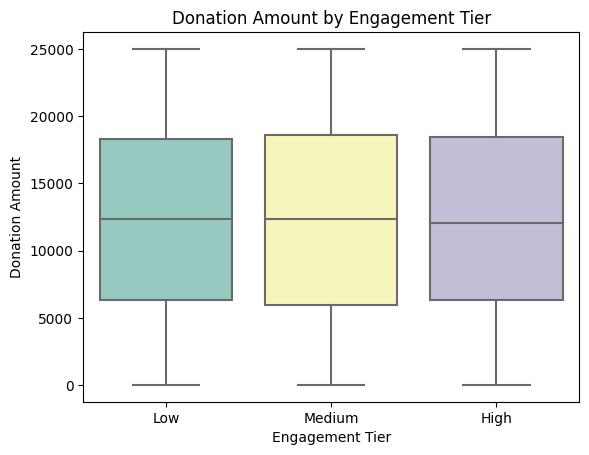

In [14]:
sns.boxplot(data=df, x="EngagementTier", y="TotalAmountDonated", palette="Set3")
plt.title("Donation Amount by Engagement Tier")
plt.xlabel("Engagement Tier")
plt.ylabel("Donation Amount")
plt.show()

### Q9: Median donation by recency tier?

<ipython-input-15-8fe5200f657a>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("RecencyTier")["TotalAmountDonated"].median().plot(kind='bar', color="orchid")


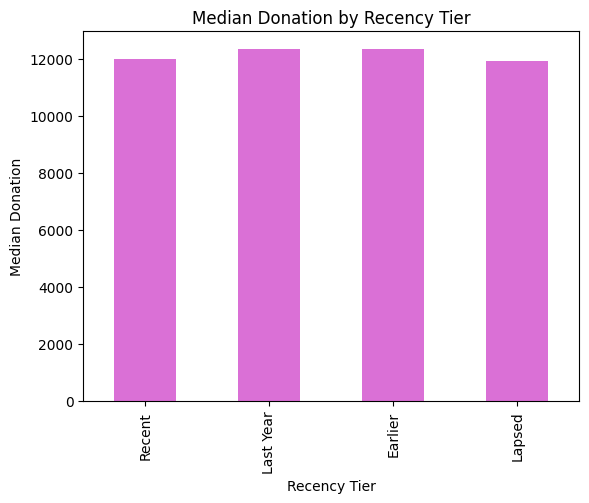

In [15]:
df.groupby("RecencyTier")["TotalAmountDonated"].median().plot(kind='bar', color="orchid")
plt.title("Median Donation by Recency Tier")
plt.xlabel("Recency Tier")
plt.ylabel("Median Donation")
plt.show()

###  Q10: Engagement distribution by giving tier?

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


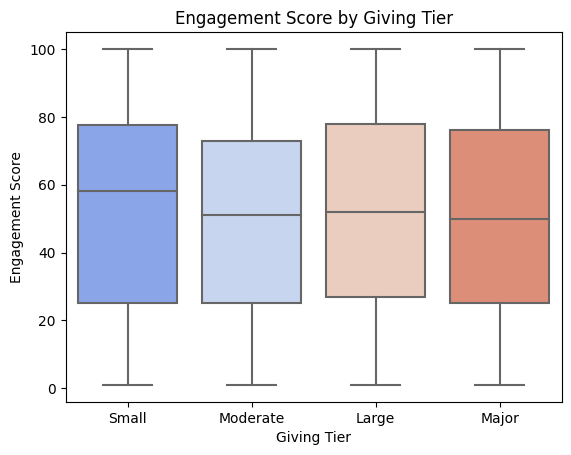

In [16]:
sns.boxplot(data=df, x="GivingTier", y="EngagementScore", palette="coolwarm")
plt.title("Engagement Score by Giving Tier")
plt.xlabel("Giving Tier")
plt.ylabel("Engagement Score")
plt.show()

### Q11: Top 10 zip codes by donor count?

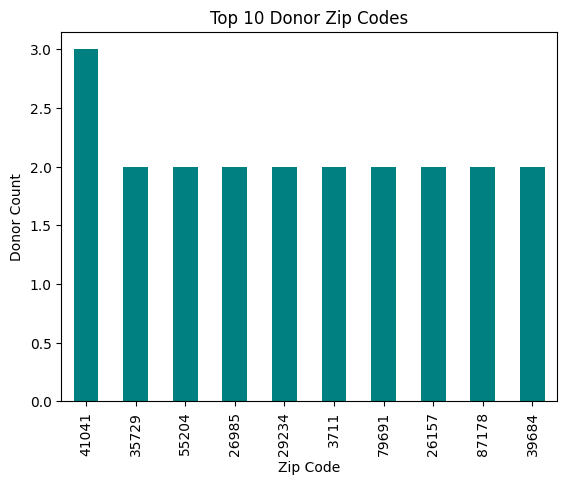

In [17]:
df["ZipCode"].value_counts().head(10).plot(kind='bar', color='teal')
plt.title("Top 10 Donor Zip Codes")
plt.xlabel("Zip Code")
plt.ylabel("Donor Count")
plt.show()

### Q12: Average recency by engagement tier?

<ipython-input-18-b78770fec09a>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("EngagementTier")["DaysSinceLastDonation"].mean().plot(kind='bar', color='crimson')


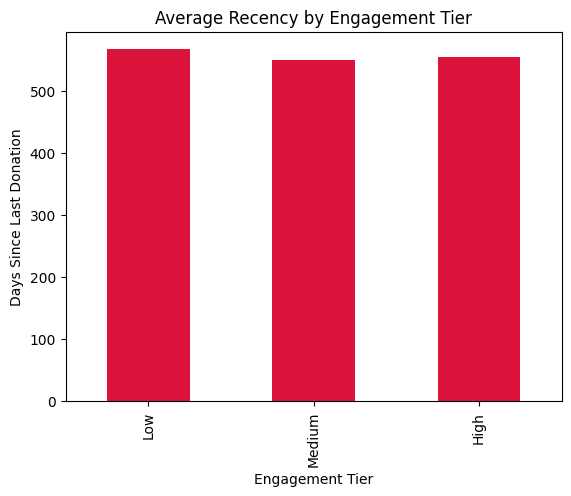

In [18]:
df.groupby("EngagementTier")["DaysSinceLastDonation"].mean().plot(kind='bar', color='crimson')
plt.title("Average Recency by Engagement Tier")
plt.xlabel("Engagement Tier")
plt.ylabel("Days Since Last Donation")
plt.show()

### Q13: Total gifts by recency tier?

<ipython-input-19-6d8b816c655e>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("RecencyTier")["TotalGifts"].sum().plot(kind='bar', color='slategray')


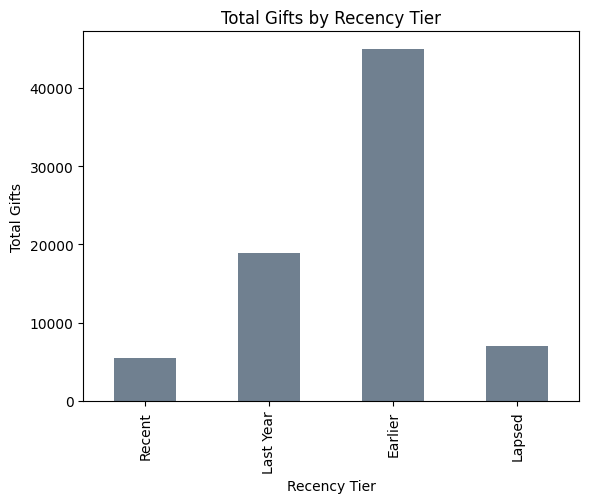

In [19]:
df.groupby("RecencyTier")["TotalGifts"].sum().plot(kind='bar', color='slategray')
plt.title("Total Gifts by Recency Tier")
plt.xlabel("Recency Tier")
plt.ylabel("Total Gifts")
plt.show()

### Q14: Engagement score distribution?

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


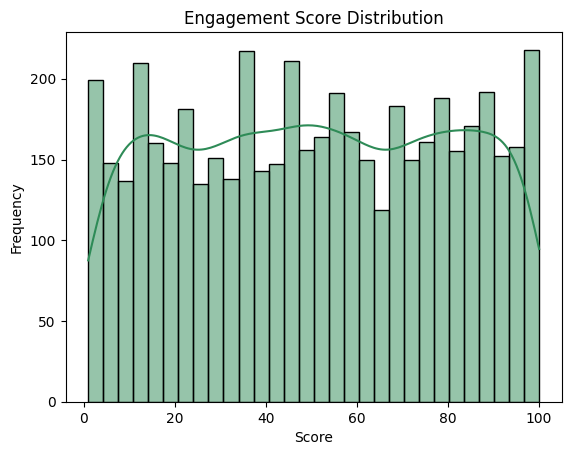

In [20]:
sns.histplot(df["EngagementScore"], bins=30, kde=True, color="seagreen")
plt.title("Engagement Score Distribution")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

### Q15: High-value donors (>$5000)?

In [21]:
high_value_donors = df[df["TotalAmountDonated"] > 5000]
high_value_donors.sort_values("TotalAmountDonated", ascending=False)[["DonorID", "TotalAmountDonated", "EngagementScore"]].head()

,DonorID,TotalAmountDonated,EngagementScore
4857,D04858,24991.84,10
3835,D03836,24987.64,59
31,D00032,24986.53,56
666,D00667,24980.20,86
1363,D01364,24972.64,22


### Q16: Most frequent donors (by gifts)?

In [22]:
df.sort_values("TotalGifts", ascending=False)[["DonorID", "TotalGifts", "TotalAmountDonated"]].head(10)

,DonorID,TotalGifts,TotalAmountDonated
4417,D04418,29,6852.10
3371,D03372,29,12185.66
4944,D04945,29,15220.45
1163,D01164,29,13817.40
1178,D01179,29,8031.39
152,D00153,29,18928.03
4553,D04554,29,1872.49
1197,D01198,29,21064.75
157,D00158,29,2171.67
158,D00159,29,11605.97


### Q17: Total donations by Engagement x Recency Tier?

<ipython-input-23-a80513769d55>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(index="EngagementTier", columns="RecencyTier", values="TotalAmountDonated", aggfunc="sum")


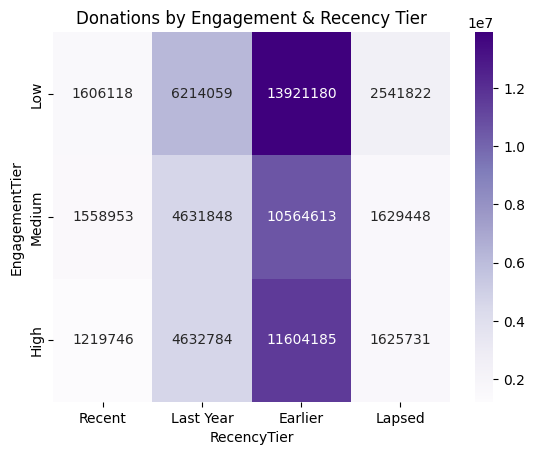

In [23]:
pivot = df.pivot_table(index="EngagementTier", columns="RecencyTier", values="TotalAmountDonated", aggfunc="sum")
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="Purples")
plt.title("Donations by Engagement & Recency Tier")
plt.show()

### Q18: Correlation between Engagement and Gifts?

In [24]:
cor = df["EngagementScore"].corr(df["TotalGifts"])
print(f"Correlation: {cor:.2f}")

Correlation: 0.01


### Q19: Engagement by Recency Tier?

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


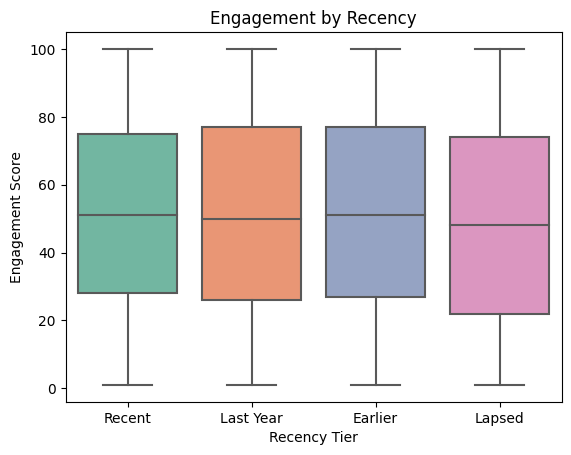

In [25]:
sns.boxplot(data=df, x="RecencyTier", y="EngagementScore", palette="Set2")
plt.title("Engagement by Recency")
plt.xlabel("Recency Tier")
plt.ylabel("Engagement Score")
plt.show()

### Q20: Distribution of average donation per gift?

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


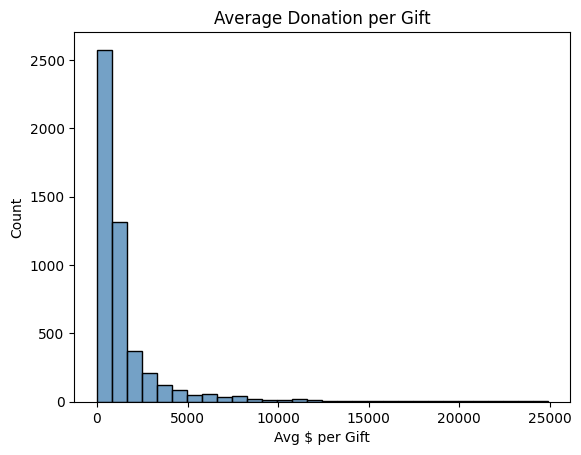

In [26]:
df["AvgDonationPerGift"] = df["TotalAmountDonated"] / df["TotalGifts"]
sns.histplot(df["AvgDonationPerGift"], bins=30, color='steelblue')
plt.title("Average Donation per Gift")
plt.xlabel("Avg $ per Gift")
plt.show()

### Q21: Engagement vs Donation (scatter)?

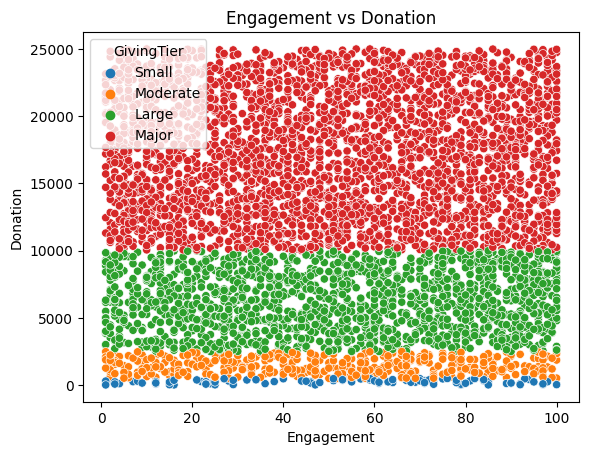

In [27]:
sns.scatterplot(data=df, x="EngagementScore", y="TotalAmountDonated", hue="GivingTier")
plt.title("Engagement vs Donation")
plt.xlabel("Engagement")
plt.ylabel("Donation")
plt.show()

### Q22: Most engaged lapsed donors?

In [28]:
df[df["DaysSinceLastDonation"] > 1000].sort_values("EngagementScore", ascending=False)[["DonorID", "EngagementScore", "TotalAmountDonated"]].head()

,DonorID,EngagementScore,TotalAmountDonated
4603,D04604,100,20240.64
3253,D03254,100,24960.56
2924,D02925,100,2612.29
355,D00356,100,12115.64
955,D00956,100,528.12


### Q23: Donor segment distribution (Engagement x Giving)?

<ipython-input-29-9bde2673dd3b>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seg_summary = df.groupby(["EngagementTier", "GivingTier"]).size().unstack()


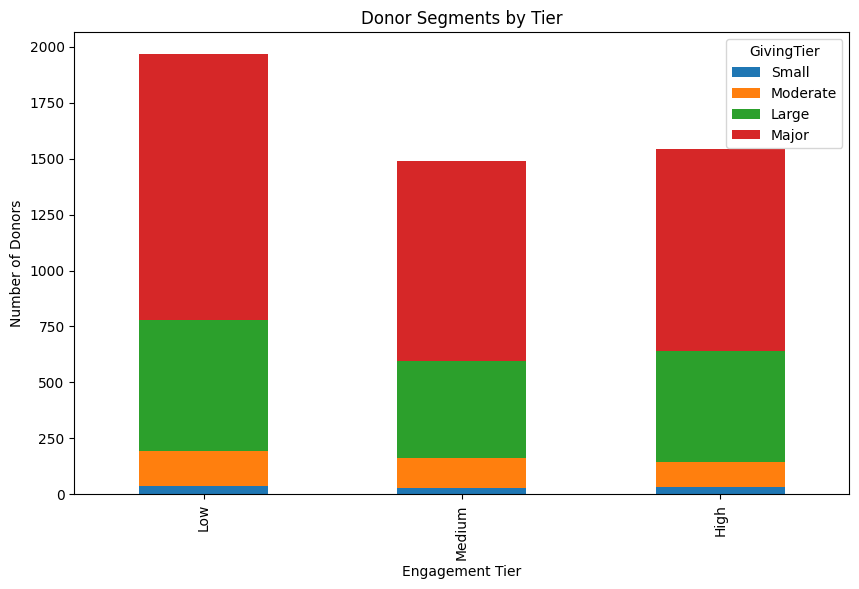

In [29]:
seg_summary = df.groupby(["EngagementTier", "GivingTier"]).size().unstack()
seg_summary.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Donor Segments by Tier")
plt.ylabel("Number of Donors")
plt.xlabel("Engagement Tier")
plt.show()